In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy.io import fits
from astropy.time import Time, TimeDelta
from astropy import units as u

In [ ]:
phases = os.listdir('data/images')
print (type(phases))
phases = [phases[0]]
print(phases)


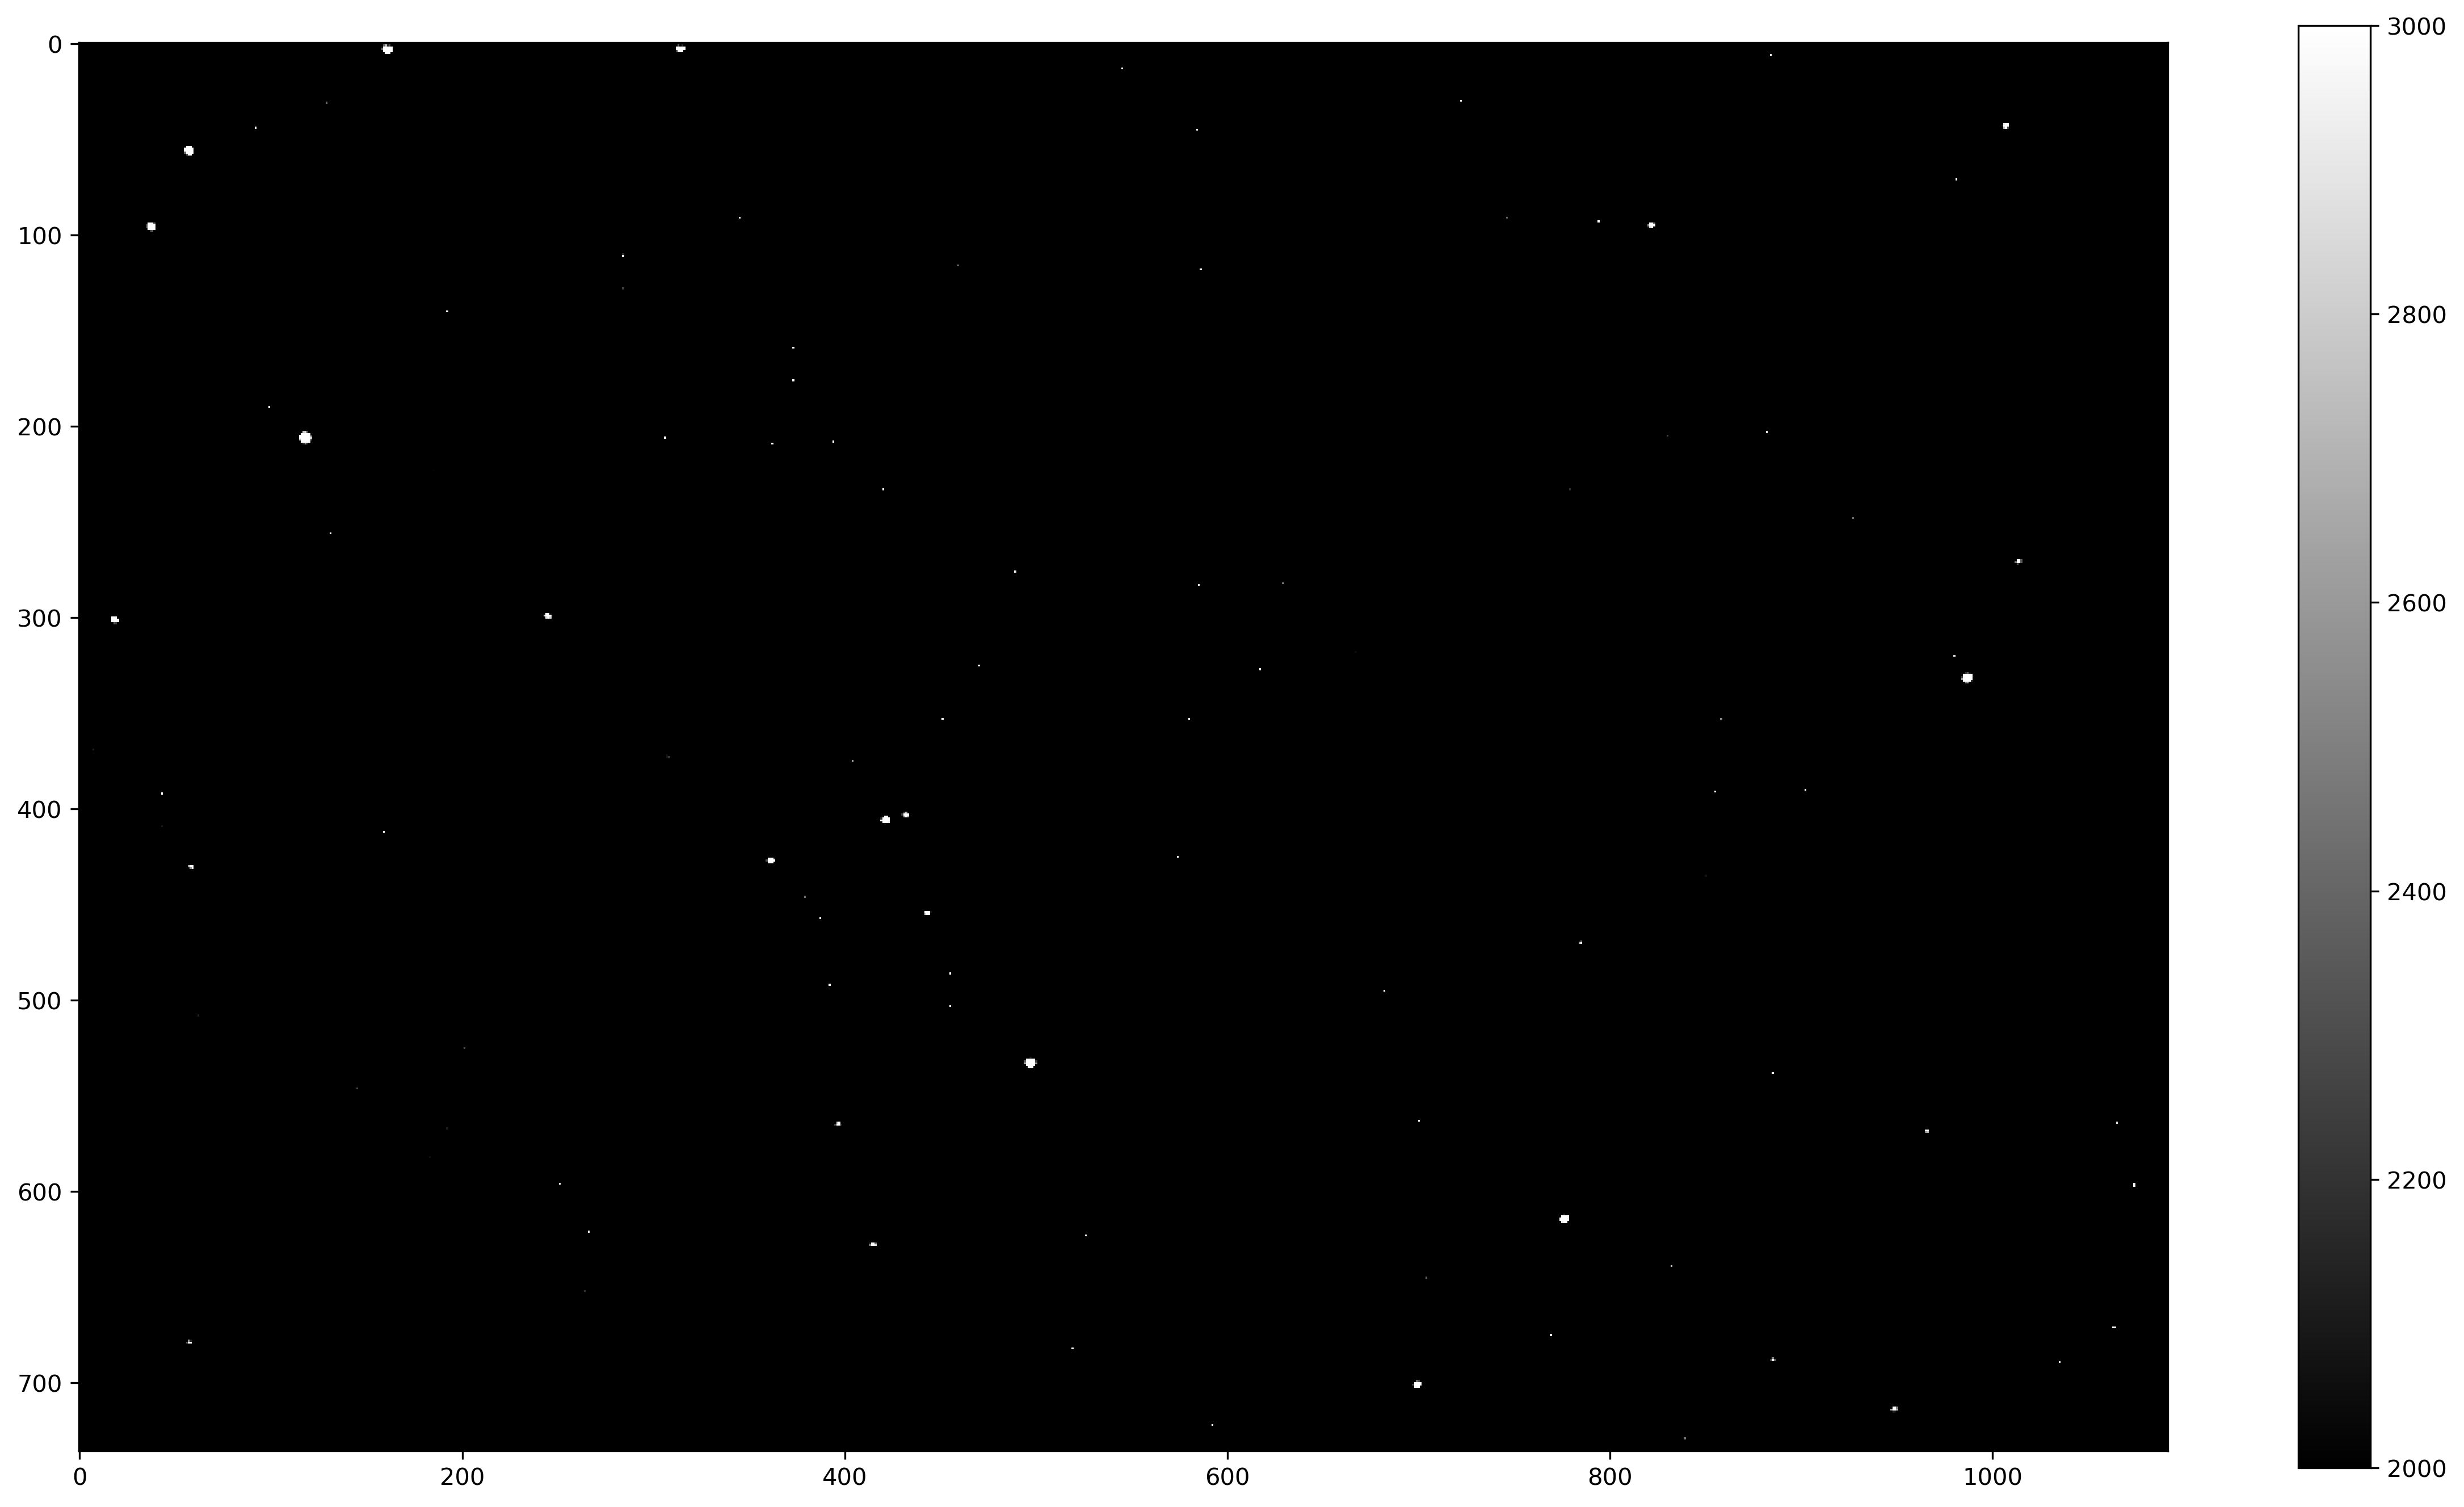

In [5]:
for dossier in phases :
    dossier_images = os.listdir('data/images/%s' %dossier)
    image_concat = []
    time  = np.zeros(len(dossier_images))
    for i, dossier_im in enumerate(dossier_images):
        image = os.listdir('data/images/%s/%s' %(dossier, dossier_im))[0]
        image_concat.append(fits.getdata('data/images/%s/%s/%s' %(dossier,dossier_im, image)))
        time[i] = fits.getheader('data/images/%s/%s/%s' %(dossier, dossier_im, image), 0)['JD']
        header = fits.getheader('data/images/%s/%s/%s' %(dossier, dossier_im, image), 0)
        
    exposition = TimeDelta(11.07 * u.s, format = 'jd')
    timemax, timemin = np.amax(time) + exposition.jd, np.amin(time)
    delta_t = TimeDelta((timemax - timemin)/2, format = 'jd')
    t = Time(delta_t.jd + timemin, format='jd')
    final_image = np.sum(image_concat, axis=0)
    
    header['TIME-OBS'] = t.iso
    header['DELTA-T'] = delta_t.sec
    header['JD'] = t.jd
    header['JD-DELTA'] = delta_t.jd
    fits.writeto('data/stacked/%s.fits' %(dossier), final_image, header, overwrite=True)
    
    fig, ax = plt.subplots(1, 1, dpi = 300, figsize = (16, 9))

    plt.imshow(final_image, cmap='gray', vmin=2.e3, vmax=3.e3)
    plt.colorbar()

    fig.tight_layout()

In [6]:
hdu_list = fits.open('data/stacked/0.4.fits')
hdu_list.info()
data, header = fits.getdata('data/stacked/0.4.fits', header=True)
header



Filename: data/stacked/0.4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   (1092, 736)   float32   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1092                                                  
NAXIS2  =                  736                                                  
DATE-OBS= '2020-03-05T10:10:25' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   1.10700000000E+001 / [sec] Duration of exposure                     
EXPOSURE=   1.10700000000E+001 / [sec] Duration of exposure                     
SET-TEMP=  -10.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -10.203084036736080 /CCD temperature at start of exposure in C       
XPIXSZ  =   13.600000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   13.600000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   